In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Listing 7.8 - A simple Functional model with two `Dense` layers
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
inputs.shape

TensorShape([None, 3])

In [4]:
inputs.dtype

tf.float32

In [5]:
features.shape

TensorShape([None, 64])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906 (3.54 KB)
Trainable params: 906 (3.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 7.9 A multi-input, multi-output Functional model
vocabulary_size = 10_000
num_tags = 100
num_departments = 4

# Define model inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# Combine input features into a single tensor, features, by concatenating them
features = layers.Concatenate()([title, text_body, tags])
# Apply an intermediate layer to recombine input features into richer representations
features = layers.Dense(64, activation="relu")(features)

# Define model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

# Create the model by specifying its inputs and outputs.
model =  keras.Model(inputs=[title, text_body, tags],
                     outputs=[priority, department])

In [8]:
# Listing 7.10 - Training a model by providing lists of input and target arrays
import numpy as np

num_samples = 1_280

# Dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# Dummy target data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 1ms/step


In [9]:
# Listing 7.11 - Training a model by providing dicts of input and target arrays
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", 
                    "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], 
                    "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, 
           "tags": tags_data},
          {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 2ms/step


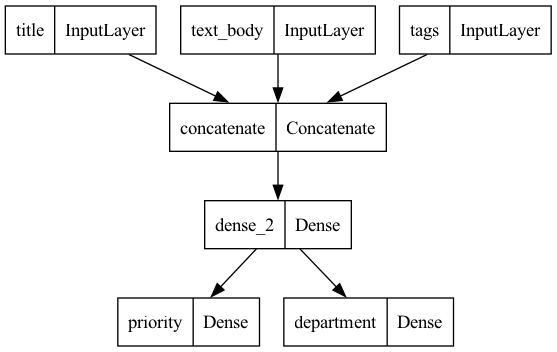

In [10]:
keras.utils.plot_model(model, "ticker_classifier.png")

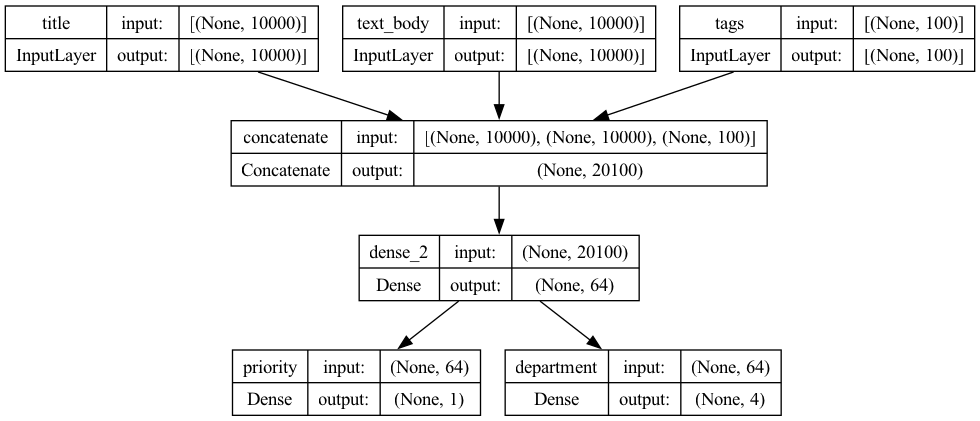

In [11]:
keras.utils.plot_model(model, "ticker_classifier_with_shape_info.png", show_shapes=True)

In [12]:
# 7.12 - Retrieving the inputs or outputs of a layer in a Functional model
model.layers

In [13]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [14]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [15]:
# 7.13 - Creating a new model by reusing intermediate layer options
features = model.layers[4].output # This is your 1st dense layer
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs =[title, text_body, tags],
    outputs = [priority, department, difficulty])

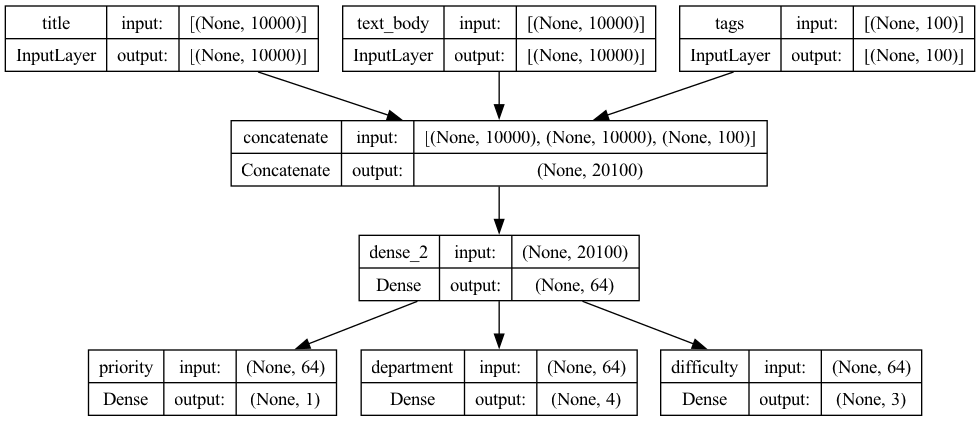

In [16]:
keras.utils.plot_model(new_model, "updated_ticker_classifier.png", show_shapes=True)